In [190]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [192]:
data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607_v2.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t', low_memory=False)
df.head(3)

,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [195]:
complex_str_set = set()
complex_size_by_str = {}
complex_dGs_by_str = {}
complex_map = {}
for i in range(len(df)):
    it = df.loc[i]
    complex_str = it['protein_sequence']+it['nucleotide_sequence']
    
    complex_str_set.add(complex_str)
    if complex_str not in complex_size_by_str:
        complex_size_by_str[complex_str] = 1
    else:
        complex_size_by_str[complex_str] += 1
    if complex_str not in complex_dGs_by_str:
        complex_dGs_by_str[complex_str] = np.array([it['dG']])
    else:
        complex_dGs_by_str[complex_str] = np.concatenate([
            complex_dGs_by_str[complex_str],
            np.array([it['dG']])
        ])
    ####
    if complex_str not in complex_map:
        complex_map[complex_str] = {
            'size' : 1,
            'dG' : np.array([it['dG']]),
            'complex_id' : np.array([it['complex_id']]),
        }
    else:
        complex_map[complex_str]['size'] += 1
        complex_map[complex_str]['dG'] = np.append(complex_map[complex_str]['dG'], it['dG'])
        complex_map[complex_str]['complex_id'] = np.append(complex_map[complex_str]['complex_id'], it['complex_id'])
print(len(complex_str_set))

9093


In [200]:
for k, v in complex_map.items():
    if v['size'] > 1 and v['dG'].var() > 0.01:
        print(v['dG'], v['complex_id'])

[-7.89 -7.1 ] [113 805]
[-7.89 -6.54] [1626 4410]


(array([ 113, 1196]),)


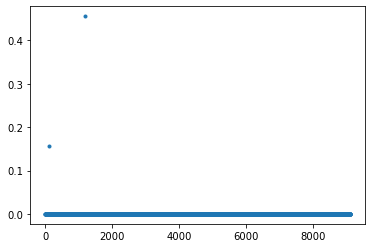

In [189]:
var_per_complex = []
for k, v in complex_dGs_by_str.items():
    var_per_complex.append(v.var())
var_per_complex = np.array(var_per_complex)
bad_complex = np.where(var_per_complex > 0.1)
print(bad_complex)
plt.plot(var_per_complex, '.')
plt.show()

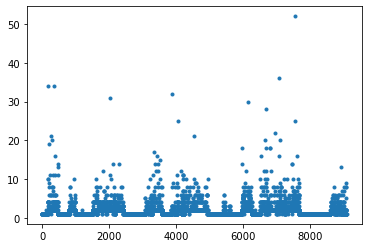

In [178]:
import matplotlib.pyplot as plt
import numpy as np

complex_sizes = []
for k,v in complex_size.items():
    complex_sizes.append(v)
complex_sizes = np.array(complex_sizes)
plt.plot(complex_sizes, '.')
plt.show()

In [181]:
complex_sizes.mean()

1.8982733971186627

In [149]:
# "cluster_protein_na_pair_index" in df.columns
collect = set()
for it in df["cluster_protein_na_pair_index"]:
    collect.add(it)

In [147]:
df["protein_50_na_50_number"]

0        1
1        2
2        2
3        7
4        7
        ..
17256    1
17257    2
17258    2
17259    1
17260    1
Name: protein_50_na_50_number, Length: 17261, dtype: int64

In [142]:
df.columns

Index(['dataset_id', 'UniProt', 'protein_sequence', 'nucleotide_sequence',
       'protein_mutation', 'nucleic_acid_type', 'nucleic_acid_type_new', 'Kd',
       'dG', 'pH', 'Tm', 'Method', 'pmid', 'data_source', 'protein_na_pair',
       'multiple_dg', 'max_min', 'max_min_judge', 'dG_ori', 'pdb_id', 'len_p1',
       'len_p2', 'protein_chain', 'na_chain', 'identity_protein_seq',
       'identity_na_seq', 'UniProt_type', 'protein_sequence_len',
       'wt_af2_file_download', 'mo_pdb_chain', 'bs_score',
       'nucleotide_sequence_one', 'nucleotide_sequence_two',
       'nucleotide_sequence_two_reverse', 'align_score',
       'len_nucleotide_sequence_one', 'len_nucleotide_sequence_two',
       'coverage_nucleotide_sequence_one', 'coverage_nucleotide_sequence_two',
       'coverage_mean_nucleotide_sequence', 'protein_index',
       'cluster_protein_50_index', 'cluster_protein_50_number',
       'cluster_protein_50_member', 'na_index', 'cluster_na_50_index',
       'cluster_na_50_number', '

In [102]:
df2 = df.reset_index()
df2.rename(columns = {'index':'complex_id'}, inplace = True)
# df2.to_csv('../data/_datasets/seq_dg_cluster_final_230607_v2.csv', index=False, sep='\t')
# print(df2['protein_index'])
df2.head(3)


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [105]:
data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607_v2.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t')
df.head(3)

<ipython-input-105-d76ae054aeab>:4: DtypeWarning: Columns (8,11,13,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file, sep='\t')


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [111]:
import numpy as np
import pandas as pd
import os

data_dir = '../data/'
data_file = 'test/test.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t')
print(df['protein_index'])
df.head(3)

0       protein_2511
1       protein_2513
2       protein_2511
3       protein_2511
4       protein_2512
            ...     
5133     protein_683
5134     protein_683
5135     protein_683
5136     protein_683
5137     protein_683
Name: protein_index, Length: 5138, dtype: object


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,13209,pnat_12423,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|TGAGTTGGTTGGACGGCTGC...,Y271A,dsDNA,dsDNA,0.980,-0.99,...,"Cluster_622,Cluster_623",1,dsDNA1258,protein_2511_dsDNA1258,"protein_1324_dsDNA1258,protein_2511_dsDNA1258,...",8,cluster_pair_3746,pnat_12423_NONE_protein_2511,Rattus norvegicus,"DNA_3230,DNA_3231"
1,13219,pnat_2082,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,Y271S,dsDNA,dsDNA,0.200,-0.98,...,"Cluster_620,Cluster_621",1,dsDNA1257,protein_2513_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_2082_NONE_protein_2513,Rattus norvegicus,"DNA_3228,DNA_3229"
2,14483,pronab_6471,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GGACGGCATTGGATCGACCA...,Y271A,DNA,dsDNA,0.314,-0.71,...,"Cluster_2456,Cluster_620",1,dsDNA1470,protein_2511_dsDNA1470,"protein_1324_dsDNA1470,protein_2511_dsDNA1470,...",4,cluster_pair_3964,pronab_6471_NONE_protein_2511,Rattus norvegicus,"DNA_3228,DNA_3856"


In [ ]:
# 请按照数据集中的protein_index列，在相应文件夹中找到pssm_hmm.txt文件，该文件是特征文件;
#  pssm_hmm.txt 文件含有 HMMblit 和 PSI-Blast 计算的蛋白序列中每个残基的保守性，共有73列信息，第一列为 蛋白序列信息；
# hmm 为前缀的为 HMMblit 计算的保守性；
# pssm 为前缀的为 PSI-Blast 计算的保守性；
# psfm为前缀的列以及se,eco,jsd为 pssm 特征的衍生特征;%   

In [201]:
pwm_dir = '../data/pwm_data/pwm'
prot_dir = 'protein_0'
data_file = os.path.join(pwm_dir, prot_dir, "pssm_hmm.txt")
pwm_df = pd.read_csv(data_file, sep='\t')
print(pwm_df.columns)
pwm_df.tail(3)

Index(['seq', 'hmm_A', 'hmm_C', 'hmm_D', 'hmm_E', 'hmm_F', 'hmm_G', 'hmm_H',
       'hmm_I', 'hmm_K', 'hmm_L', 'hmm_M', 'hmm_N', 'hmm_P', 'hmm_Q', 'hmm_R',
       'hmm_S', 'hmm_T', 'hmm_V', 'hmm_W', 'hmm_Y', 'hmm_M->M', 'hmm_M->I',
       'hmm_M->D', 'hmm_I->M', 'hmm_I->I', 'hmm_D->M', 'hmm_D->D', 'hmm_Neff',
       'hmm_Neff_I', 'hmm_Neff_D', 'pssm_A', 'pssm_R', 'pssm_N', 'pssm_D',
       'pssm_C', 'pssm_Q', 'pssm_E', 'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L',
       'pssm_K', 'pssm_M', 'pssm_F', 'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W',
       'pssm_Y', 'pssm_V', 'psfm_A', 'psfm_R', 'psfm_N', 'psfm_D', 'psfm_C',
       'psfm_Q', 'psfm_E', 'psfm_G', 'psfm_H', 'psfm_I', 'psfm_L', 'psfm_K',
       'psfm_M', 'psfm_F', 'psfm_P', 'psfm_S', 'psfm_T', 'psfm_W', 'psfm_Y',
       'psfm_V', 'se', 'eco', 'jsd'],
      dtype='object')


,seq,hmm_A,hmm_C,hmm_D,hmm_E,hmm_F,hmm_G,hmm_H,hmm_I,hmm_K,...,psfm_F,psfm_P,psfm_S,psfm_T,psfm_W,psfm_Y,psfm_V,se,eco,jsd
540,E,0.9999,0.9999,0.9999,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,...,0,0,0,0,0,0,0,532.158149,1.5135,49.517135
541,I,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.0000,0.9999,...,0,0,0,0,0,0,2,616.896657,1.6001,49.511069
542,C,0.9999,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0,0,0,0,0,0,0,664.385619,1.5525,50.339389


In [163]:
hmm_cols = pwm_df.columns[pwm_df.columns.str.startswith("hmm")]
print(hmm_cols)
print(len(hmm_cols))
pwm_df.iloc[:, 1:1+30].head(3)

Index(['hmm_A', 'hmm_C', 'hmm_D', 'hmm_E', 'hmm_F', 'hmm_G', 'hmm_H', 'hmm_I',
       'hmm_K', 'hmm_L', 'hmm_M', 'hmm_N', 'hmm_P', 'hmm_Q', 'hmm_R', 'hmm_S',
       'hmm_T', 'hmm_V', 'hmm_W', 'hmm_Y', 'hmm_M->M', 'hmm_M->I', 'hmm_M->D',
       'hmm_I->M', 'hmm_I->I', 'hmm_D->M', 'hmm_D->D', 'hmm_Neff',
       'hmm_Neff_I', 'hmm_Neff_D'],
      dtype='object')
30


,hmm_A,hmm_C,hmm_D,hmm_E,hmm_F,hmm_G,hmm_H,hmm_I,hmm_K,hmm_L,...,hmm_M->M,hmm_M->I,hmm_M->D,hmm_I->M,hmm_I->I,hmm_D->M,hmm_D->D,hmm_Neff,hmm_Neff_I,hmm_Neff_D
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.1315,0.0,0.0
1,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.1315,0.0,0.0
2,0.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.1315,0.0,0.0


In [168]:
pssm_cols = pwm_df.columns[pwm_df.columns.str.startswith("pssm")]
print(pssm_cols)
print(len(pssm_cols))
# 1+len(hmm_cols) ~ 1+len(hmm_cols)+len(psfm_cols)
ibeg = 1+len(hmm_cols)
iend = 1+len(hmm_cols)+len(pssm_cols)
pwm_df.iloc[:, ibeg:iend].head(3)

Index(['pssm_A', 'pssm_R', 'pssm_N', 'pssm_D', 'pssm_C', 'pssm_Q', 'pssm_E',
       'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L', 'pssm_K', 'pssm_M', 'pssm_F',
       'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W', 'pssm_Y', 'pssm_V'],
      dtype='object')
20


,pssm_A,pssm_R,pssm_N,pssm_D,pssm_C,pssm_Q,pssm_E,pssm_G,pssm_H,pssm_I,pssm_L,pssm_K,pssm_M,pssm_F,pssm_P,pssm_S,pssm_T,pssm_W,pssm_Y,pssm_V
0,0.047426,0.047426,0.017986,0.006693,0.047426,0.119203,0.017986,0.006693,0.017986,0.268941,0.500000,0.047426,0.999955,0.119203,0.006693,0.047426,0.047426,0.047426,0.047426,0.268941
1,0.997527,0.047426,0.047426,0.047426,0.268941,0.119203,0.119203,0.268941,0.047426,0.047426,0.047426,0.119203,0.119203,0.017986,0.119203,0.500000,0.268941,0.017986,0.047426,0.119203
2,0.997527,0.047426,0.047426,0.047426,0.952574,0.119203,0.119203,0.268941,0.047426,0.047426,0.047426,0.119203,0.119203,0.017986,0.119203,0.500000,0.268941,0.017986,0.047426,0.268941


In [169]:
psfm_cols = pwm_df.columns[pwm_df.columns.str.startswith("psfm")]
print(psfm_cols)
print(len(psfm_cols))
# 1+len(hmm_cols) ~ 1+len(hmm_cols)+len(psfm_cols)
ibeg = 1+len(hmm_cols)+len(pssm_cols)
iend = 1+len(hmm_cols)+len(pssm_cols)+len(psfm_cols)
pwm_df.iloc[:, ibeg:iend].head(3)

Index(['psfm_A', 'psfm_R', 'psfm_N', 'psfm_D', 'psfm_C', 'psfm_Q', 'psfm_E',
       'psfm_G', 'psfm_H', 'psfm_I', 'psfm_L', 'psfm_K', 'psfm_M', 'psfm_F',
       'psfm_P', 'psfm_S', 'psfm_T', 'psfm_W', 'psfm_Y', 'psfm_V'],
      dtype='object')
20


,psfm_A,psfm_R,psfm_N,psfm_D,psfm_C,psfm_Q,psfm_E,psfm_G,psfm_H,psfm_I,psfm_L,psfm_K,psfm_M,psfm_F,psfm_P,psfm_S,psfm_T,psfm_W,psfm_Y,psfm_V
0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0
1,97,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
2,92,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [136]:
xx = pwm_df.iloc[:, 1:1+30].values
# xx = xx.values
xx.shape

(543, 30)

In [139]:
y = np.concatenate([xx, xx], axis=-1)
y.shape

(543, 60)

In [3]:
set_uni_prot = set()
for i in range(len(df)):
    up_id = df.loc[i]['UniProt']
    set_uni_prot.add(up_id)
print(len(set_uni_prot))

781


In [4]:
n = len(df)
ss = set()
for i in range(n):
    rdna_seq = df.loc[i]['nucleotide_sequence']
    for it in rdna_seq:
        ss.add(it)
ss

{'A', 'C', 'G', 'T', 'U', '|'}

In [5]:
n = len(df)
ss = set()
n_double_seq = 0
n_single_seq = 0
for i in range(n):
    rdna_seq = df.loc[i]['nucleotide_sequence']
    if '|' in rdna_seq:
        n_double_seq+=1
    else:
        n_single_seq+=1
n_double_seq, n_single_seq

(7095, 10166)

In [6]:
def binarize_categorical(matrix, n_classes, out=None):
    L = matrix.shape[0]
    matrix = matrix.astype(np.int32)
    if out is None:
        out = np.zeros([L, n_classes], dtype=np.bool_)
    subset = (matrix>=0) & (matrix<n_classes)
    out[np.arange(L)[subset],matrix[subset]] = 1
    return out

In [7]:
rdna_seq = df.loc[0]['nucleotide_sequence']


rdna_map = {'A':0, 'T':1, 'C':2, 'G':3, 'U':3}
rdna_seqs = None
if '|' in rdna_seq:
    rdna_seqs = rdna_seq.split('|')
else:
    rdna_seqs = [rdna_seq]

rdna_attributes = list()
for seq in rdna_seqs:
    seq_int = [rdna_map[x] for x in seq]
    seq_int = np.array(seq_int)
    seq_mat = binarize_categorical(seq_int, 4).astype(np.float32)
    print(seq_mat.shape)
    rdna_attributes.append(seq_mat)
np.concatenate(rdna_attributes).shape

(9, 4)
(9, 4)


(18, 4)

In [25]:
# data_file = 'seq_dg_identity_230404.csv'
data_file = 'table_hox_zscore_102107.txt'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t')
df.head(3)

,8mer,8mer.1,Alx3_3418.2,Alx4_1744.1,Arx_1738.2,Bapx1_2343.1,Barhl1_2590.2,Barhl2_3868.1,Barx1_2877.1,Barx2_3447.2,...,Tcf1_2666.2,Tcf2_0913.2,Tgif1_2342.2,Tgif2_3451.1,Titf1_1722.2,Tlx2_3498.2,Uncx4.1_2281.2,Vax1_3499.1,Vax2_3500.1,Vsx1_1728.1
0,AAAAAAAA,TTTTTTTT,2.3401,1.7044,2.5305,0.7962,1.8823,3.2222,1.2282,2.0546,...,1.4632,-0.0636,1.2235,0.0742,2.0043,0.5475,1.3708,1.6994,2.2566,3.3771
1,AAAAAAAC,GTTTTTTT,1.3416,1.4467,0.9565,0.0567,1.8291,2.4403,0.9911,1.2143,...,1.1287,1.0444,-0.2575,0.9416,0.3597,-0.2338,0.9116,1.2902,0.9958,1.2923
2,AAAAAAAG,CTTTTTTT,1.3386,1.0929,1.4749,1.1892,1.0593,1.4076,0.3329,1.2362,...,0.5170,0.4963,0.3452,0.2785,2.1461,-0.3770,0.3261,1.0687,0.3439,2.3979


In [26]:
prots = [x for x in df.keys()][2:]
prots = [x.split('_')[0] for x in prots]
print(prots)

['Alx3', 'Alx4', 'Arx', 'Bapx1', 'Barhl1', 'Barhl2', 'Barx1', 'Barx2', 'Bsx', 'Cart1', 'Cart1', 'Cdx1', 'Cdx2', 'Cphx', 'Crx', 'Cutl1', 'Cutl1', 'Dbx1', 'Dbx2', 'Dlx1', 'Dlx2', 'Dlx3', 'Dlx4', 'Dlx5', 'Dmbx1', 'Dobox4', 'Dobox5', 'Duxl', 'Emx2', 'En1', 'En2', 'Esx1', 'Evx1', 'Evx2', 'Gbx1', 'Gbx2', 'Gsc', 'Gsh2', 'Hdx', 'Hlx1', 'Hlxb9', 'Hmbox1', 'Hmx1', 'Hmx2', 'Hmx3', 'Homez', 'Hoxa1', 'Hoxa10', 'Hoxa11', 'Hoxa13', 'Hoxa2', 'Hoxa3', 'Hoxa4', 'Hoxa5', 'Hoxa6', 'Hoxa7', 'Hoxa7', 'Hoxa9', 'Hoxb13', 'Hoxb3', 'Hoxb4', 'Hoxb5', 'Hoxb6', 'Hoxb7', 'Hoxb8', 'Hoxb9', 'Hoxc10', 'Hoxc11', 'Hoxc12', 'Hoxc13', 'Hoxc4', 'Hoxc5', 'Hoxc6', 'Hoxc8', 'Hoxc9', 'Hoxd1', 'Hoxd10', 'Hoxd11', 'Hoxd12', 'Hoxd13', 'Hoxd3', 'Hoxd8', 'Ipf1', 'Irx2', 'Irx3', 'Irx3', 'Irx4', 'Irx5', 'Irx6', 'Isl2', 'Isx', 'Lbx2', 'Lhx1', 'Lhx2', 'Lhx3', 'Lhx4', 'Lhx5', 'Lhx6', 'Lhx6', 'Lhx8', 'Lhx9', 'Lmx1a', 'Lmx1b', 'Meis1', 'Meox1', 'Mrg1', 'Mrg2', 'Msx1', 'Msx2', 'Msx3', 'Nkx1-1', 'Nkx1-2', 'Nkx2-2', 'Nkx2-3', 'Nkx2-4', 'Nkx2

In [27]:
data_dir2 = '_datasets'
data_file = 'homeodomains_mouse.fa'
data_file = os.path.join(data_dir, data_dir2, data_file)
f = open(data_file, 'r')
Lines = f.readlines()

prot2seq = dict()
name = None
for line in Lines:
    if line[0] == '>':
        name = line[1:-1]
    else:
        if name is not None and name in prots:
            prot2seq[name] = line[:-1]
        name = None
map2seq = {x:prot2seq[x] for x in prots if x in prot2seq.keys()}

In [28]:
prot_keys = [x for x in df.keys()][2:]
mapping = {
    'protein_sequence' : [],
    'nucleotide_sequence' : [],
    'zscore' : [],
}
for i in range(len(df)):
    
    # items = [df.loc[i][k] for k in prot_keys if k.split('_')[0] in map2seq.keys()]
    for k in prot_keys:
        orig_k = k
        k = k.split('_')[0]
        if k in map2seq.keys():
            p_seq = map2seq[k]
            n_seq = df.loc[i]['8mer'] + '|' + df.loc[i]['8mer.1']
            z = df.loc[i][orig_k]
            mapping['protein_sequence'].append(p_seq)
            mapping['nucleotide_sequence'].append(n_seq)
            mapping['zscore'].append(z)
            
out_df = pd.DataFrame(mapping)
out_df.to_csv('../data/hox_zscore.csv', index=False, sep='\t')

In [35]:

data_file = '../data/hox_zscore.csv'

df = pd.read_csv(data_file, sep='\t')
df.head(3)

,protein_sequence,nucleotide_sequence,zscore
0,RRNRTTFSTFQLEELEKVFQKTHYPDVYAREQLALRTDLTEARVQV...,AAAAAAAA|TTTTTTTT,2.3401
1,RRNRTTFTSYQLEELEKVFQKTHYPDVYAREQLAMRTDLTEARVQV...,AAAAAAAA|TTTTTTTT,1.7044
2,RRYRTTFTSYQLEELERAFQKTHYPDVFTREELAMRLDLTEARVQV...,AAAAAAAA|TTTTTTTT,2.5305


In [40]:
8048/32.

251.5